## Приведение уравнения поверхности к каноническому виду

In [1]:
x = .
y = .
z = .
u = .
v = .
u[x_, y_, z_] := 7*x^2 + 8*x*y + 3*y^2 + 8*x*z + 6*y*z + 3*z^2 + 6*x + y + 7;
u[x, y, z] // TraditionalForm

FormBox[RowBox[{RowBox[{"7", " ", SuperscriptBox["x", "2"]}], "+", 

 
>        RowBox[{"8", " ", "x", " ", "y"}], "+", RowBox[{"8", " ", "x", " ", "z"}], "+",\
 
>    
     RowBox[{"6", " ", "x"}], "+", RowBox[{"3", " ", SuperscriptBox["y", "2"]}],\
 
>    "+", 
     RowBox[{"6", " ", "y", " ", "z"}], "+", "y", "+", 

 
>        RowBox[{"3", " ", SuperscriptBox["z", "2"]}], "+", "7"}], TraditionalForm]

7   4   4

4   3   3

4   3   3
3

0.5

0
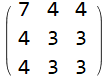
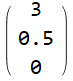

In [8]:
A = {
    {7, 4, 4},
    {4, 3, 3},
    {4, 3, 3}   
};
B = {{3}, {0.5}, {0}};
a0 = 7;

MatrixForm[A]
MatrixForm[B]

7 - l   4       4

4       3 - l   3

4       3       3 - l
            2    3
-10 l + 13 l  - l
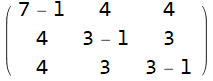

In [13]:
(* Характеристический многочлен *)
l = .
AE[l_] := A - IdentityMatrix[3] * l;
MatrixForm[AE[l]]

charPoly = Det[AE[l]]

In [18]:
(* Собственные значения *)
sols = Solve[charPoly == 0, l];
eigenvalues = l /. sols;
MatrixForm[N[eigenvalues], TableDirections -> Row]

0.       0.821092 12.1789

{x -> 0, z -> -y}
{0., 1., -1.}
        1  (29 - 3 Sqrt[129]) x         1  (29 - 3 Sqrt[129]) x
{y -> -(-) --------------------, z -> -(-) --------------------}
        4    -13 + Sqrt[129]            4    -13 + Sqrt[129]
{1., -0.772364, -0.772364}
        1  (-29 - 3 Sqrt[129]) x         1  (-29 - 3 Sqrt[129]) x
{y -> -(-) ---------------------, z -> -(-) ---------------------}
        4     13 + Sqrt[129]             4     13 + Sqrt[129]
{1., 0.647364, 0.647364}
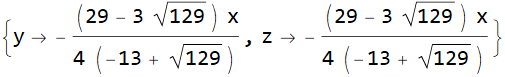
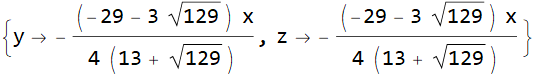

In [22]:
(* Собственные векторы *)
variables = {x, y, z};

vector1 = Solve[AE[eigenvalues[[1]]] . variables == 0][[1]]
(* Возьмем y = 1 *)
vector1 = variables /. vector1 /. y -> 1;
N[vector1]

vector2 = Solve[AE[eigenvalues[[2]]] . variables == 0][[1]]
(* Возьмем x = 1 *)
vector2 = variables /. vector2 /. x -> 1;
N[vector2]

vector3 = Solve[AE[eigenvalues[[3]]] . variables == 0][[1]]
(* Возьмем x = 1 *)
vector3 = variables /. vector3 /. x -> 1;
N[vector3]

eigenvectors = {vector1, vector2, vector3};

In [37]:
(* Проверка собственных значений и векторов *)
{values, vectors} = Eigensystem[A];
eigenSystem = {};
For[i = 1, i <= Length[values], i++,
    eigenSystem = Append[eigenSystem, {values[[i]], vectors[[i]]}]
];
(* Сортируем по собственным значениям *)
eigenSystem = Sort[eigenSystem, (#1[[1]] < #2[[1]])&];

values = Sort[values];
If[values == eigenvalues,
    For[i = 1, i <= Length[values], i++,
        (* Сравниваем нормированные векторы. Они могут отличаться знаком *)
        If[FullSimplify @ Normalize @ eigenSystem[[i, 2]] === FullSimplify @ Normalize @ eigenvectors[[i]] || 
           FullSimplify @ Normalize @ eigenSystem[[i, 2]] === FullSimplify @ Normalize @ -eigenvectors[[i]],
           Print["Eigenvectors ", i, " are equal"],
           Print["Eigenvectors ", i, " are not equal"]
        ]
    ]
]

Eigenvectors 1 are equal
Eigenvectors 2 are equal
Eigenvectors 3 are equal


0.          0.675261    0.737579

0.707107    -0.521547   0.477482

-0.707107   -0.521547   0.477482
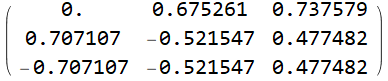

In [45]:
(* Матрица перехода из нормированых собственных векторов *)
S = Map[Normalize, eigenvectors] // Transpose;
MatrixForm[N[S]]

0.              0.              0.

                                          -16
0.              0.821092        7.77156 10


0.              0.              12.1789
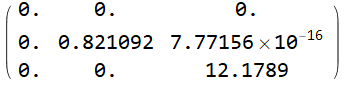

In [48]:
(* Диагональная матрица *)
A1 = Transpose[S] . A . S;
MatrixForm[N[A1]]

0.353553

1.76501

2.45148
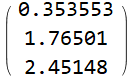

In [51]:
(* Преобразование коэффициентов линейной формы *)
B1 = Transpose[S] . B;
MatrixForm[N[B1]]

In [54]:
(* Почти приведенное уравнение *)
v = (Transpose[variables] . A1 . variables + Transpose[variables] . B1 + a0)[[1]];
Simplify[v] // TraditionalForm

FormBox[RowBox[{RowBox[{"0.35355339059326957`", " ", "x"}], "+", 

 
>        RowBox[{"0.8210916541996776`", " ", SuperscriptBox["y", "2"]}], "+", 

 
>        RowBox[{"y", " ", RowBox[{"(", 

 
>            RowBox[{RowBox[{"5.1248987806356226`*^-14", " ", "z"}], "+", 

 
>              "1.7650095814831261`"}], ")"}]}], "+", 

 
>        RowBox[{"12.178908345800016`", " ", SuperscriptBox["z", "2"]}], "+", 

 
>        RowBox[{"2.4514773458615755`", " ", "z"}], "+", "6.999999999999903`"}], 

 
>      TraditionalForm]

In [57]:
(* Приведенное уравнение *)
v = 0;
a1 = a0;

(* Убираем линейные члены, приводя к полному квадрату, где это возможно *)
For[i = 1, i <= Length[variables], i++,
    If[A1[[i, i]] != 0,
        v += A1[[i, i]] * (variables[[i]] + B1[[i, 1]] / A1[[i, i]]) ^ 2;
        a1 -= B1[[i, 1]] ^ 2 / A1[[i, i]],
    (*Else*)
        v += 2 * B1[[i, 1]] * variables[[i]]
    ]
]
v = ((v + a1) / a1) // N;
(* Превращаем в функцию *)
v = Function[{x, y, z}, Evaluate[v]];

v[x, y, z] // TraditionalForm

FormBox[RowBox[{"0.3686635944700463`", " ", 

 
>        RowBox[{"(", RowBox[{RowBox[{"0.7071067811865475`", " ", "x"}], "+", 

 
>            RowBox[{"0.8210916541997262`", " ", 

 
>              SuperscriptBox[RowBox[{"(", RowBox[{"y", "+", "2.1495889922342357`"}], 

 
>                 ")"}], "2"]}], "+", RowBox[{"12.17890834580027`", " ", 

 
>              SuperscriptBox[RowBox[{"(", RowBox[{"z", "+", "0.20128875891466744`"}], 

 
>                 ")"}], "2"]}], "+", "2.712499999999998`"}], ")"}]}], TraditionalForm]

-Graphics3D-
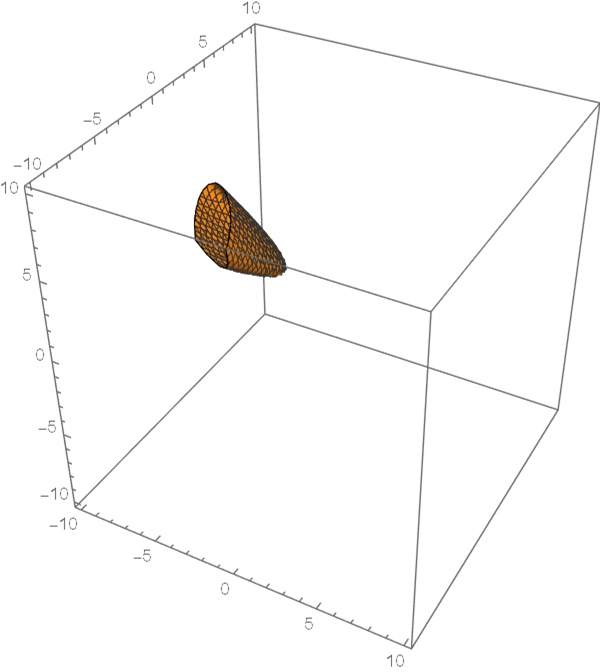

In [66]:
ContourPlot3D[u[x, y, z] == 0, {x, -10, 10}, {y, -10, 10}, {z, -10, 10}]

-Graphics3D-
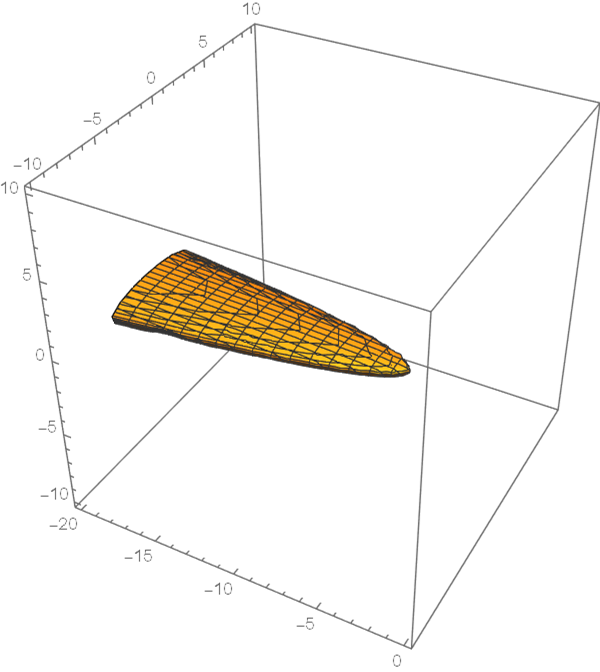

In [67]:
ContourPlot3D[v[x, y, z]==0, {x, -20, 0}, {y, -10, 10}, {z, -10, 10}]